In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import datetime
import matplotlib
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from glob import glob
import random
from uncertainties import ufloat
from uncertainties import unumpy
import tensorflow as tf
tf.random.set_seed(
    4201337
)
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout, Conv1D, InputLayer
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import TimeSeriesSplit

In [2]:
def calc_derivative(df, diff=1):
    dt = pd.Series(df.index).diff(periods=diff)
    dXdt = df.reset_index().diff(periods=diff).div(dt, axis=0)
    dXdt = dXdt.add_suffix('_derivative_1')
    return dXdt.set_index(df.index)

def evaluate(y_true, y_hat, label='test'):
    mse = mean_squared_error(y_true, y_hat)
    rmse = np.sqrt(mse)
    variance = r2_score(y_true, y_hat)
    print('{} set RMSE:{}, R2:{}'.format(label, rmse, variance))
    return rmse, variance

In [3]:
nodelabels=['timestamp', 'Stempel_innen_mitte', 'Stempel_aussen', 'Matrize_zarge_oben', 'Matrize_zarge_mitte','Matrize_zarge_unten', 'Werkstueck_boden', 'Werkstueck_zarge_unten' , 'Werkstueck_zarge_mitte', 'Werkstueck_zarge_oben']

filenames = glob("../merged/*.csv")

dfs = []
print('train_data')
for filename in filenames:
    print("reading: {}".format(filename))    
    df = pd.read_csv(filename,names=nodelabels,skiprows=1,index_col=False).drop_duplicates().drop(columns='timestamp')
    dXdt = calc_derivative(df, diff=5)
    df_wd = df.join(dXdt)
    dfs.append(df_wd)
    
data= pd.concat(df, axis=0, ignore_index=True).dropna()



['../merged/merged_WS950_WZ90_p23_t10.csv', '../merged/merged_WS950_WZ90_p19_t10.csv', '../merged/merged_WS890_WZ160_p10_t4.csv', '../merged/merged_WS1000_WZ100_p11_t8.csv', '../merged/merged_WS890_WZ160_p11_t4.csv', '../merged/merged_WS890_WZ160_p10_t10.csv']
train_data
reading: ../merged/merged_WS950_WZ110_p19_t8.csv
reading: ../merged/merged_WS1000_WZ100_p11_t6.csv
reading: ../merged/merged_WS840_WZ130_p10_t10.csv
reading: ../merged/merged_WS940_WZ70_p12_t8.csv
reading: ../merged/merged_WS940_WZ70_p12_t6.csv
reading: ../merged/merged_WS1000_WZ100_p11_t4.csv
reading: ../merged/merged_WS950_WZ90_p15_t10.csv
reading: ../merged/merged_WS840_WZ130_p10_t4.csv
reading: ../merged/merged_WS940_WZ70_p11_t6.csv
reading: ../merged/merged_WS950_WZ110_p19_t10.csv
reading: ../merged/merged_WS950_WZ110_p19 .csv
reading: ../merged/merged_WS940_WZ70_p11_t4.csv
test_data
reading: ../merged/merged_WS950_WZ90_p23_t10.csv
reading: ../merged/merged_WS950_WZ90_p19_t10.csv
reading: ../merged/merged_WS890_WZ

/home/fneubuerger/.local/anaconda3/lib/python3.8/site-packages/pandas/util/_decorators.py:311: ParserWarning: Length of header or names does not match length of data. This leads to a loss of data with index_col=False.
  return func(*args, **kwargs)


In [4]:
train_data.keys()

Index(['Stempel_innen_mitte', 'Stempel_aussen', 'Matrize_zarge_oben',
       'Matrize_zarge_mitte', 'Matrize_zarge_unten', 'Werkstueck_boden',
       'Werkstueck_zarge_unten', 'Werkstueck_zarge_mitte',
       'Werkstueck_zarge_oben', 'index_derivative_1',
       'Stempel_innen_mitte_derivative_1', 'Stempel_aussen_derivative_1',
       'Matrize_zarge_oben_derivative_1', 'Matrize_zarge_mitte_derivative_1',
       'Matrize_zarge_unten_derivative_1', 'Werkstueck_boden_derivative_1',
       'Werkstueck_zarge_unten_derivative_1',
       'Werkstueck_zarge_mitte_derivative_1',
       'Werkstueck_zarge_oben_derivative_1'],
      dtype='object')

In [5]:

Werkstueck_labels = ['Werkstueck_boden', 'Werkstueck_zarge_mitte',
                       'Werkstueck_zarge_oben', 'Werkstueck_boden_derivative_1',                       
                       'Werkstueck_zarge_mitte_derivative_1',
                       'Werkstueck_zarge_oben_derivative_1']
no_derivatives_labels = ['Stempel_innen_mitte_derivative_1', 'Stempel_aussen_derivative_1',
                        'Matrize_oben_zarge_derivative_1', 'Matrize_mitte_zarge_derivative_1',
                        'Matrize_unten_zarge_derivative_1', 'Werkstueck_boden','Werkstueck_flansch', 'Werkstueck_zarge_mitte', 'Werkstück_zarge_unten',
                       'Werkstueck_zarge_oben', 'Werkstueck_boden_derivative_1',
                       'Werkstueck_flansch_derivative_1',
                       'Werkstueck_zarge_mitte_derivative_1',
                       'Werkstück_zarge_unten_derivative_1',
                       'Werkstueck_zarge_oben_derivative_1']
targets= ['Werkstueck_boden', 'Werkstueck_zarge_mitte',
                       'Werkstueck_zarge_oben']
 

In [6]:
train_data.keys()

Index(['Stempel_innen_mitte', 'Stempel_aussen', 'Matrize_zarge_oben',
       'Matrize_zarge_mitte', 'Matrize_zarge_unten', 'Werkstueck_boden',
       'Werkstueck_zarge_unten', 'Werkstueck_zarge_mitte',
       'Werkstueck_zarge_oben', 'index_derivative_1',
       'Stempel_innen_mitte_derivative_1', 'Stempel_aussen_derivative_1',
       'Matrize_zarge_oben_derivative_1', 'Matrize_zarge_mitte_derivative_1',
       'Matrize_zarge_unten_derivative_1', 'Werkstueck_boden_derivative_1',
       'Werkstueck_zarge_unten_derivative_1',
       'Werkstueck_zarge_mitte_derivative_1',
       'Werkstueck_zarge_oben_derivative_1'],
      dtype='object')

In [ ]:
X = data.drop(labels=Werkstueck_labels , axis=1)
y = data[targets]

def tsfold(model, n_splits =5, )
    tscv = TimeSeriesSplit()
    print(tscv)
    train_scores = []
    test_scores = []
    TimeSeriesSplit(gap=0, max_train_size=None, n_splits=n_splits, test_size=None)
    for k,(train_index, test_index) in enumerate(tscv.split(data)):
        print('__________Fold {}__________'.format(k+1))
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        
        model.fit(X_train, y_train) 
        y_hat_test = model.predict(X_test)
        test_rmse, test_variance = evaluate(y_hat_test, y_hat_test)
        test_scores.append([test_rmse, test_variance])
        
    mean_train = np.mean(train_scores, axis=0)
    std_train = np.std(train_scores, axis=0)
    RMSE = ufloat(mean_train[0], std_train[0])
    R2 = ufloat(mean_train[1], std_train[1])
    print('__________Summary__________')
    print('RMSE:{} , R2:{}'.format(RMSE,R2))

    return RMSE, R2

In [7]:
X_train = train_data.drop(labels=Werkstueck_labels , axis=1)
y_train = train_data[targets]
X_test = test_data.drop(labels=Werkstueck_labels, axis=1)
y_test = test_data[targets]

In [8]:
def kfold(model, k):
    train_scores = []
    test_scores = []
    for k, (fold_X, fold_y)  in enumerate(zip(np.array_split(X_train, 3),np.array_split(y_train, 3))):
        print('__________Fold {}__________'.format(k+1))
        model.fit(fold_X, fold_y)
    
        y_hat_train = model.predict(fold_X)    
        rmse, variance = evaluate(fold_y, y_hat_train, 'train')
        train_scores.append([rmse, variance])

        y_hat_test = model.predict(X_test)
        test_rmse, test_variance = evaluate(y_hat_test, y_hat_test)
        test_scores.append([test_rmse, test_variance])
    
    mean_train = np.mean(train_scores, axis=0)
    std_train = np.std(train_scores, axis=0)
    RMSE = ufloat(mean_train[0], std_train[0])
    R2 = ufloat(mean_train[1], std_train[1])
    print('__________Summary__________')
    print('RMSE:{} , R2:{}'.format(RMSE,R2))

    return RMSE, R2

### Simple linear model as baseline

In [9]:
#kfold
model=LinearRegression()
mean_train, std_train = kfold(model, 3)

__________Fold 1__________
train set RMSE:3.488307042191877, R2:0.9998888047748388
test set RMSE:0.0, R2:1.0
__________Fold 2__________
train set RMSE:9.652836600393892, R2:0.9991320757073745
test set RMSE:0.0, R2:1.0
__________Fold 3__________
train set RMSE:3.498759809518883, R2:0.9998768920313633
test set RMSE:0.0, R2:1.0
__________Summary__________
RMSE:5.5+/-2.9 , R2:0.99963+/-0.00035


In [10]:
# over all data
lm = LinearRegression()
lm.fit(X_train, y_train)
y_hat_train = lm.predict(X_train)
evaluate(y_train, y_hat_train, 'train')

y_hat_test = lm.predict(X_test)
evaluate(y_test, y_hat_test)

train set RMSE:13.77916133617279, R2:0.9982160252898679
test set RMSE:28.160700844407238, R2:0.9906677590122072


(28.160700844407238, 0.9906677590122072)

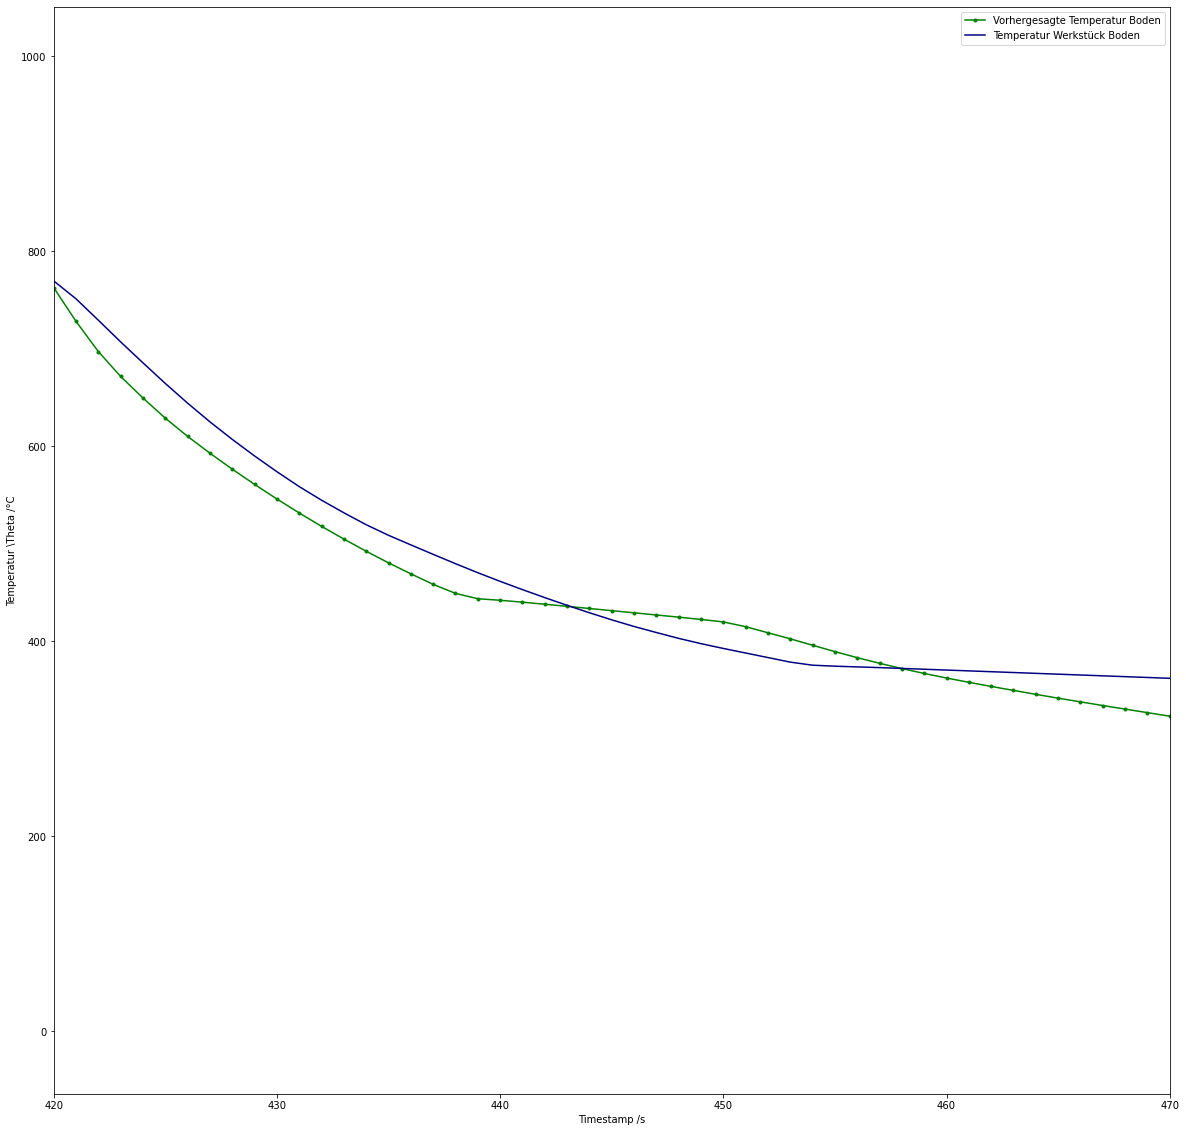

In [11]:
Timestamp=np.arange(len(test_data))
plt.figure(figsize=(20,20))
plt.plot(Timestamp, y_hat_test[:,0], 'g.-', label='Vorhergesagte Temperatur Boden')
plt.plot(Timestamp, test_data['Werkstueck_boden'],label='Temperatur Werkstück Boden', color='navy')
plt.ylabel('Temperatur \Theta /°C')
plt.xlabel('Timestamp /s')
plt.xlim(420, 470)
plt.legend()
plt.savefig('plots/linear_model.png')

### Try RandomForestRegressor

In [12]:
rf = RandomForestRegressor(n_estimators=100)
rf.fit(X_train, y_train)

RandomForestRegressor()

In [13]:
mean_train, std_train = kfold(rf, 3)

__________Fold 1__________
train set RMSE:1.4127593755425065, R2:0.9999817635515594
test set RMSE:0.0, R2:1.0
__________Fold 2__________
train set RMSE:2.207649419832693, R2:0.999954608492612
test set RMSE:0.0, R2:1.0
__________Fold 3__________
train set RMSE:1.146779193661303, R2:0.9999867748081988
test set RMSE:0.0, R2:1.0
__________Summary__________
RMSE:1.6+/-0.5 , R2:0.999974+/-0.000014


In [14]:
RMSEs = []
R2s = []
for trees in np.arange(10, 200,10):
    rf = RandomForestRegressor(n_estimators=trees)
    RMSE, R2 = kfold(rf, 3)
    RMSEs.append(RMSE)
    R2s.append(R2)



RMSEs  = unumpy.uarray([x.nominal_value for x in RMSEs],[x.std_dev for x in RMSEs] )
R2s  = unumpy.uarray([x.nominal_value for x in R2s],[x.std_dev for x in R2s] )


__________Fold 1__________
train set RMSE:1.8358344610835569, R2:0.9999692088084359
test set RMSE:0.0, R2:1.0
__________Fold 2__________
train set RMSE:2.8560302912801605, R2:0.9999240052217045
test set RMSE:0.0, R2:1.0
__________Fold 3__________
train set RMSE:2.5640777692645873, R2:0.9999338784754883
test set RMSE:0.0, R2:1.0
__________Summary__________
RMSE:2.4+/-0.4 , R2:0.999942+/-0.000019
__________Fold 1__________
train set RMSE:1.8155039773545367, R2:0.9999698845688236
test set RMSE:0.0, R2:1.0
__________Fold 2__________
train set RMSE:2.258315542260478, R2:0.9999525063892228
test set RMSE:0.0, R2:1.0
__________Fold 3__________
train set RMSE:1.8231698561075702, R2:0.9999665712782565
test set RMSE:0.0, R2:1.0
__________Summary__________
RMSE:1.97+/-0.21 , R2:0.999963+/-0.000008
__________Fold 1__________
train set RMSE:1.8179844069478333, R2:0.9999698031459774
test set RMSE:0.0, R2:1.0
__________Fold 2__________
train set RMSE:2.201681039266612, R2:0.9999548552454351
test set R

[190]
[20]


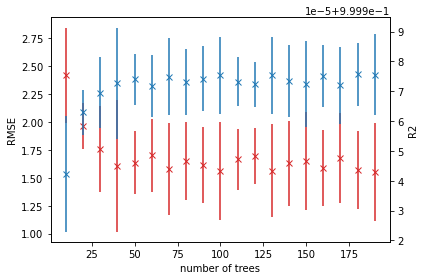

In [15]:


fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('number of trees')
ax1.set_ylabel('RMSE')
ax1.errorbar(np.arange(10,200,10), unumpy.nominal_values(RMSEs), yerr=unumpy.std_devs(RMSEs), fmt='x', color=color)
ax1.tick_params(axis='y')

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('R2')  # we already handled the x-label with ax1
ax2.errorbar(np.arange(10,200,10), unumpy.nominal_values(R2s), yerr=unumpy.std_devs(R2s),fmt='x', color=color)
ax2.tick_params(axis='y')

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.savefig('plots/tree_parameter.png')
print(np.arange(10,200,10)[unumpy.nominal_values(RMSEs)==min(unumpy.nominal_values(RMSEs))])
print(np.arange(10,200,10)[unumpy.std_devs(RMSEs)==min(unumpy.std_devs(RMSEs))])

In [16]:
y_hat_train = rf.predict(X_train)
evaluate(y_train, y_hat_train, 'train')

y_hat_test = rf.predict(X_test)
evaluate(y_test, y_hat_test)

train set RMSE:29.7494647125963, R2:0.9916855295271696
test set RMSE:74.61256722968858, R2:0.9344924016403815


(74.61256722968858, 0.9344924016403815)

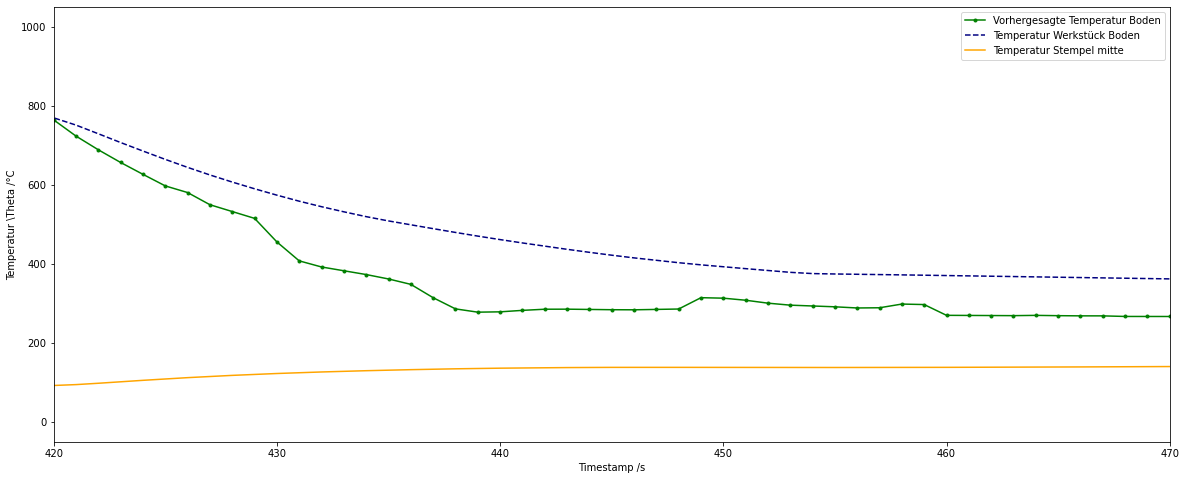

In [17]:
plt.figure(figsize=(20,8))
plt.plot(Timestamp, y_hat_test[:,0], 'g.-', label='Vorhergesagte Temperatur Boden')
plt.plot(Timestamp, y_test['Werkstueck_boden'], '--',label='Temperatur Werkstück Boden', color='navy')
plt.plot(Timestamp, test_data['Stempel_innen_mitte'],label='Temperatur Stempel mitte', color='orange')
#plt.plot(Timestamp, test_data['Matrize_mitte_zarge'],label='Temperatur Stempel mitte', color='crimson')

plt.ylabel('Temperatur \Theta /°C')
plt.xlabel('Timestamp /s')
plt.xlim(420, 470)
plt.legend()
plt.savefig('plots/random_forest_model.png')

In [18]:
from sklearn.multioutput import MultiOutputRegressor
gb = MultiOutputRegressor(GradientBoostingRegressor())
gb.fit(X_train, y_train)

MultiOutputRegressor(estimator=GradientBoostingRegressor())

In [19]:
mean_train, std_train = kfold(gb, 3)

__________Fold 1__________
train set RMSE:1.1668111540637192, R2:0.9999875634160748
test set RMSE:0.0, R2:1.0
__________Fold 2__________
train set RMSE:2.686020507492717, R2:0.9999328231620123
test set RMSE:0.0, R2:1.0
__________Fold 3__________
train set RMSE:1.0705356080435966, R2:0.999988478756345
test set RMSE:0.0, R2:1.0
__________Summary__________
RMSE:1.6+/-0.7 , R2:0.999970+/-0.000026


In [20]:
y_hat_train = gb.predict(X_train)
evaluate(y_train, y_hat_train, 'train')

y_hat_test = gb.predict(X_test)
evaluate(y_test, y_hat_test)

train set RMSE:26.02360163683014, R2:0.9936353153107479
test set RMSE:66.80649445428188, R2:0.9474430189839192


(66.80649445428188, 0.9474430189839192)

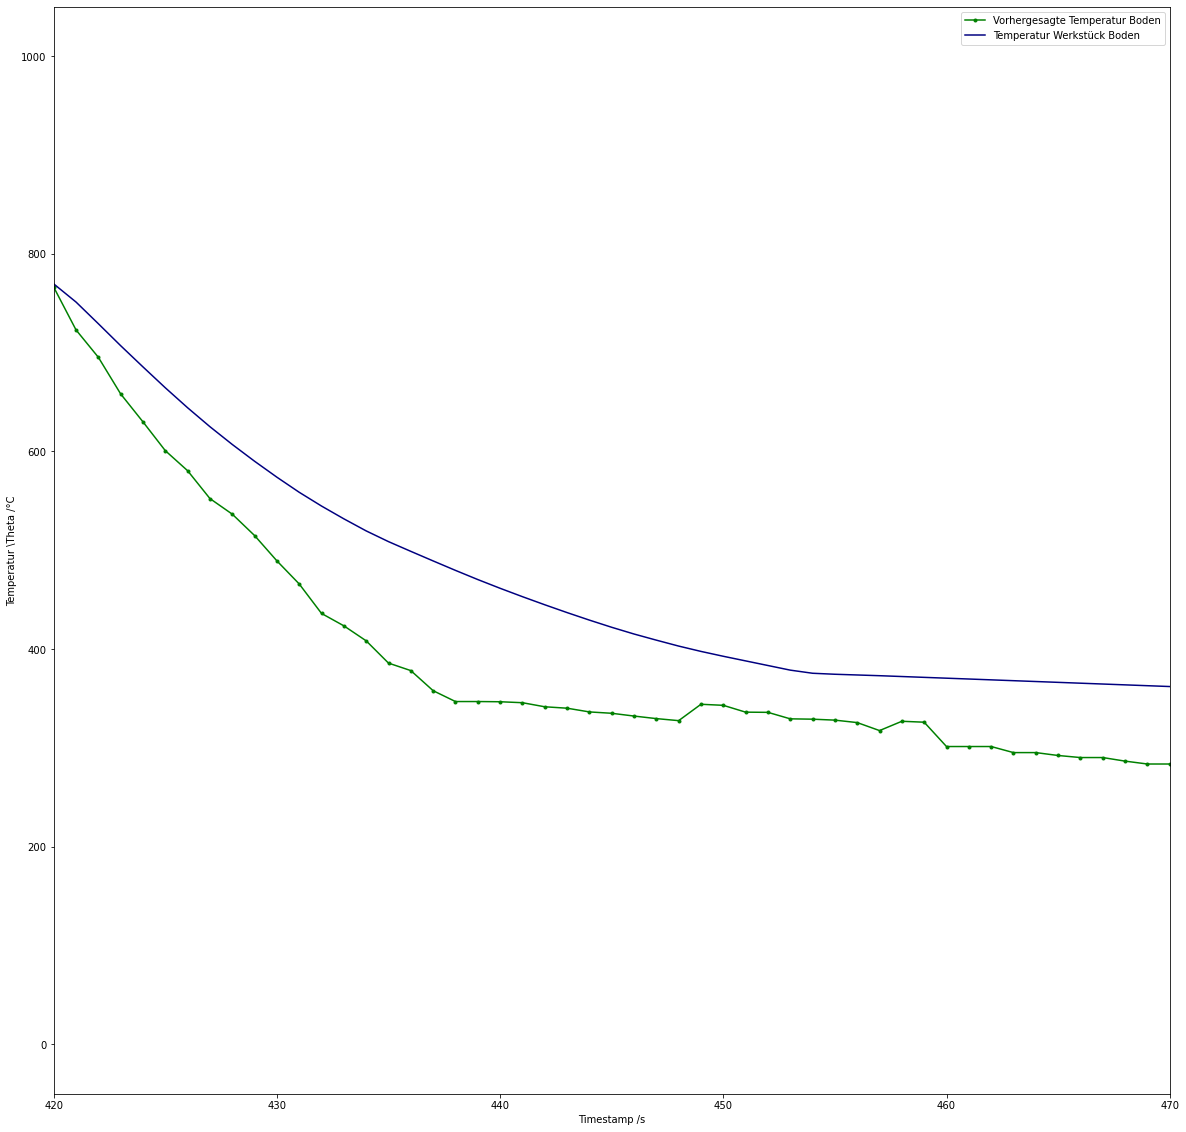

In [21]:
plt.figure(figsize=(20,20))
plt.plot(Timestamp, y_hat_test[:,0], 'g.-', label='Vorhergesagte Temperatur Boden')
plt.plot(Timestamp, y_test['Werkstueck_boden'],label='Temperatur Werkstück Boden', color='navy')
plt.ylabel('Temperatur \Theta /°C')
plt.xlabel('Timestamp /s')
plt.xlim(420, 470)
plt.legend()

plt.savefig('plots/gradient_boosting_model.png')

### Even better with MLP?

In [22]:
scaler = MinMaxScaler()
scaler.fit(X_train)

X_train_scaled = X_train.copy()
X_train_scaled = pd.DataFrame(scaler.transform(X_train))


X_test_scaled = X_test.copy()
X_test_scaled= pd.DataFrame(scaler.transform(X_test))


In [23]:
input_dim = len(X_train.keys())
output_dim= len(y_train.keys())
model = Sequential()
model.add(Dense(64, input_dim=input_dim, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(output_dim))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                896       
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 16)                528       
                                                                 
 dense_3 (Dense)             (None, 3)                 51        
                                                                 
Total params: 3,555
Trainable params: 3,555
Non-trainable params: 0
_________________________________________________________________


In [24]:
model.compile(loss='mean_squared_error', optimizer='adam')
epochs = 300
history = model.fit(X_train, y_train,
                    validation_data=(X_test, y_test),
                    epochs=epochs)

Epoch 1/300
62/62 [==============================] - 1s 3ms/step - loss: 146692.5781 - val_loss: 4018.4995
Epoch 2/300
62/62 [==============================] - 0s 2ms/step - loss: 2403.3596 - val_loss: 1512.0125
Epoch 3/300
62/62 [==============================] - 0s 2ms/step - loss: 628.7369 - val_loss: 1697.1910
Epoch 4/300
62/62 [==============================] - 0s 2ms/step - loss: 440.4662 - val_loss: 1938.4183
Epoch 5/300
62/62 [==============================] - 0s 2ms/step - loss: 392.3500 - val_loss: 1999.5626
Epoch 6/300
62/62 [==============================] - 0s 2ms/step - loss: 374.1573 - val_loss: 1973.4244
Epoch 7/300
62/62 [==============================] - 0s 2ms/step - loss: 368.0003 - val_loss: 2017.2368
Epoch 8/300
62/62 [==============================] - 0s 2ms/step - loss: 355.8060 - val_loss: 1936.4740
Epoch 9/300
62/62 [==============================] - 0s 2ms/step - loss: 345.8951 - val_loss: 1861.5585
Epoch 10/300
62/62 [==============================] - 0s 2ms

62/62 [==============================] - 0s 2ms/step - loss: 49.9076 - val_loss: 421.7043
Epoch 81/300
62/62 [==============================] - 0s 2ms/step - loss: 44.9485 - val_loss: 365.2261
Epoch 82/300
62/62 [==============================] - 0s 2ms/step - loss: 44.4052 - val_loss: 307.4092
Epoch 83/300
62/62 [==============================] - 0s 2ms/step - loss: 41.9774 - val_loss: 369.6257
Epoch 84/300
62/62 [==============================] - 0s 2ms/step - loss: 49.1029 - val_loss: 364.1943
Epoch 85/300
62/62 [==============================] - 0s 2ms/step - loss: 42.9777 - val_loss: 372.2209
Epoch 86/300
62/62 [==============================] - 0s 2ms/step - loss: 44.5179 - val_loss: 413.9498
Epoch 87/300
62/62 [==============================] - 0s 2ms/step - loss: 45.3959 - val_loss: 365.4279
Epoch 88/300
62/62 [==============================] - 0s 2ms/step - loss: 45.2494 - val_loss: 377.4337
Epoch 89/300
62/62 [==============================] - 0s 2ms/step - loss: 43.7059 - va

62/62 [==============================] - 0s 2ms/step - loss: 34.7415 - val_loss: 260.4026
Epoch 160/300
62/62 [==============================] - 0s 2ms/step - loss: 35.3583 - val_loss: 345.1821
Epoch 161/300
62/62 [==============================] - 0s 2ms/step - loss: 34.1862 - val_loss: 277.9618
Epoch 162/300
62/62 [==============================] - 0s 2ms/step - loss: 41.8225 - val_loss: 331.3564
Epoch 163/300
62/62 [==============================] - 0s 2ms/step - loss: 36.9018 - val_loss: 390.5553
Epoch 164/300
62/62 [==============================] - 0s 2ms/step - loss: 35.8011 - val_loss: 271.0530
Epoch 165/300
62/62 [==============================] - 0s 2ms/step - loss: 31.0538 - val_loss: 417.9486
Epoch 166/300
62/62 [==============================] - 0s 2ms/step - loss: 42.9223 - val_loss: 287.5560
Epoch 167/300
62/62 [==============================] - 0s 2ms/step - loss: 36.9485 - val_loss: 354.8375
Epoch 168/300
62/62 [==============================] - 0s 2ms/step - loss: 51.

Epoch 238/300
62/62 [==============================] - 0s 2ms/step - loss: 35.2331 - val_loss: 298.3700
Epoch 239/300
62/62 [==============================] - 0s 3ms/step - loss: 25.6807 - val_loss: 347.1522
Epoch 240/300
62/62 [==============================] - 0s 3ms/step - loss: 29.2302 - val_loss: 341.0355
Epoch 241/300
62/62 [==============================] - 0s 3ms/step - loss: 26.5764 - val_loss: 394.2751
Epoch 242/300
62/62 [==============================] - 0s 2ms/step - loss: 33.4052 - val_loss: 305.7349
Epoch 243/300
62/62 [==============================] - 0s 2ms/step - loss: 34.2371 - val_loss: 300.8471
Epoch 244/300
62/62 [==============================] - 0s 2ms/step - loss: 41.9395 - val_loss: 372.4207
Epoch 245/300
62/62 [==============================] - 0s 2ms/step - loss: 26.5145 - val_loss: 309.2532
Epoch 246/300
62/62 [==============================] - 0s 2ms/step - loss: 27.2190 - val_loss: 298.6624
Epoch 247/300
62/62 [==============================] - 0s 2ms/st

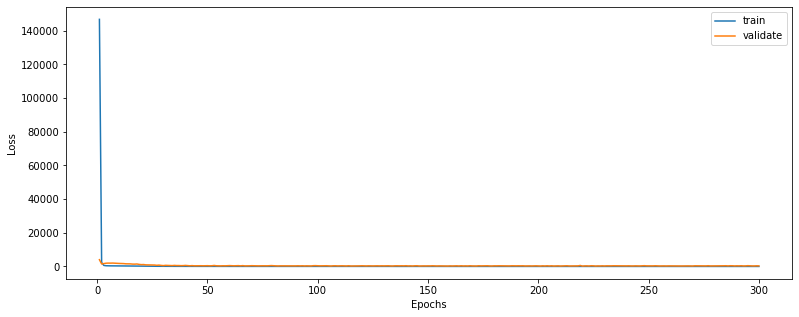

In [25]:
def plot_loss(fit_history):
    plt.figure(figsize=(13,5))
    plt.plot(range(1, len(fit_history.history['loss'])+1), fit_history.history['loss'], label='train')
    plt.plot(range(1, len(fit_history.history['val_loss'])+1), fit_history.history['val_loss'], label='validate')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

plot_loss(history)

In [26]:
y_hat_train = model.predict(X_train)
evaluate(y_train, y_hat_train, 'train')

y_hat_test = model.predict(X_test)
evaluate(y_test, y_hat_test)

train set RMSE:4.3890310142286, R2:0.9998191515961841
test set RMSE:18.628798740283607, R2:0.9959170657825563


(18.628798740283607, 0.9959170657825563)

In [27]:
mean_train, std_train = kfold(model, 3)

__________Fold 1__________
21/21 [==============================] - 0s 1ms/step - loss: 19.6690
train set RMSE:4.586228432167369, R2:0.9998077962045077
test set RMSE:0.0, R2:1.0
__________Fold 2__________
21/21 [==============================] - 0s 2ms/step - loss: 34.4548
train set RMSE:5.195181803113029, R2:0.9997490415414377
test set RMSE:0.0, R2:1.0
__________Fold 3__________
21/21 [==============================] - 0s 1ms/step - loss: 28.9094
train set RMSE:5.314382774767671, R2:0.9997161473848584
test set RMSE:0.0, R2:1.0
__________Summary__________
RMSE:5.03+/-0.32 , R2:0.99976+/-0.00004


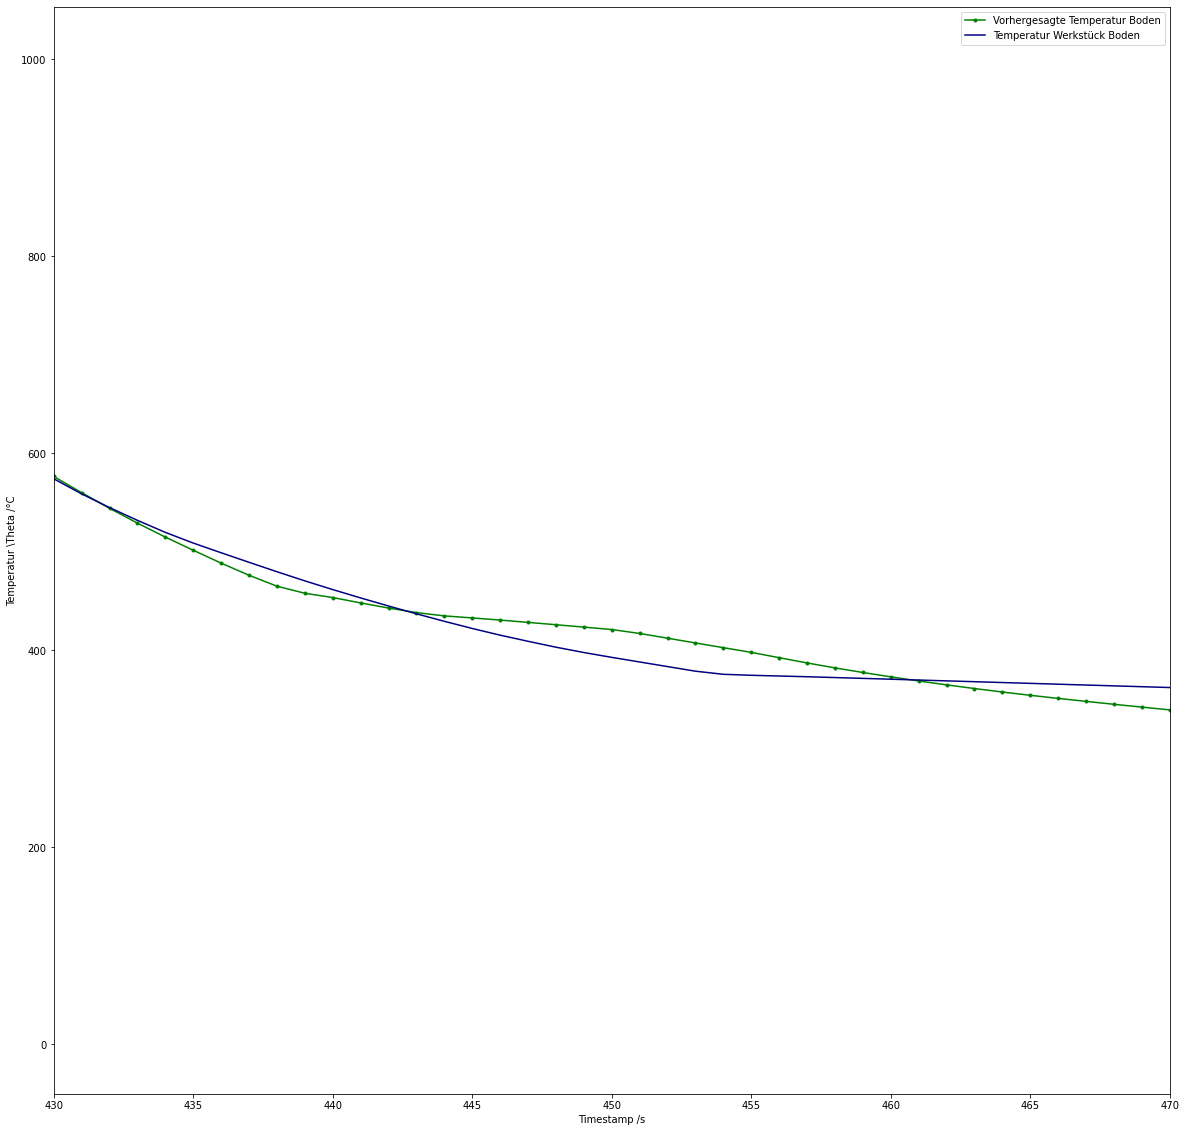

In [28]:
plt.figure(figsize=(20,20))
plt.plot(Timestamp, y_hat_test[:,0], 'g.-', label='Vorhergesagte Temperatur Boden')
plt.plot(Timestamp, y_test['Werkstueck_boden'],label='Temperatur Werkstück Boden', color='navy')
plt.ylabel('Temperatur \Theta /°C')
plt.xlabel('Timestamp /s')
plt.xlim(430, 470)
plt.legend()

plt.savefig('plots/mlp.png')

In [29]:
import tensorflow_probability as tfp
tfd = tfp.distributions
tfpl = tfp.layers

negloglik = lambda y, rv_y: -rv_y.log_prob(y)

def posterior_mean_field(kernel_size, bias_size=0, dtype=None):
    n = kernel_size + bias_size
    c = np.log(np.expm1(1.))
    return tf.keras.Sequential([
      tfp.layers.VariableLayer(2 * n, dtype=dtype),
      tfp.layers.DistributionLambda(lambda t: tfd.Independent(
          tfd.Normal(loc=t[..., :n],
                     scale=1e-5 + tf.nn.softplus(c + t[..., n:])),
          reinterpreted_batch_ndims=1)),
    ])
def prior_trainable(kernel_size, bias_size=0, dtype=None):
    n = kernel_size + bias_size
    return tf.keras.Sequential([
      tfp.layers.VariableLayer(n, dtype=dtype),
      tfp.layers.DistributionLambda(lambda t: tfd.Independent(
          tfd.Normal(loc=t, scale=1),
          reinterpreted_batch_ndims=1)),
  ])

input_dim = len(X_train.keys())
output_dim= len(y_train.keys())

model = Sequential()

model.add(Dense(64, input_dim=input_dim, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(tfpl.IndependentNormal.params_size(output_dim),
                       activation=None))
model.add(tfpl.IndependentNormal(output_dim))
model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 64)                896       
                                                                 
 dense_5 (Dense)             (None, 32)                2080      
                                                                 
 dense_6 (Dense)             (None, 16)                528       
                                                                 
 dense_7 (Dense)             (None, 6)                 102       
                                                                 
 independent_normal (Indepen  ((None, 3),              0         
 dentNormal)                  (None, 3))                         
                                                                 
Total params: 3,606
Trainable params: 3,606
Non-trainable params: 0
____________________________________________________

In [30]:
model.compile(loss='mse', optimizer='adam')
epochs = 300
history = model.fit(X_train, y_train,
                    validation_data=(X_test, y_test),
                    epochs=epochs)

Epoch 1/300
62/62 [==============================] - 1s 4ms/step - loss: 311810.6562 - val_loss: 157625.0000
Epoch 2/300
62/62 [==============================] - 0s 2ms/step - loss: 74254.0547 - val_loss: 2718.9136
Epoch 3/300
62/62 [==============================] - 0s 2ms/step - loss: 1398.0660 - val_loss: 2113.1550
Epoch 4/300
62/62 [==============================] - 0s 2ms/step - loss: 531.4210 - val_loss: 2198.7031
Epoch 5/300
62/62 [==============================] - 0s 2ms/step - loss: 442.8747 - val_loss: 2151.0820
Epoch 6/300
62/62 [==============================] - 0s 2ms/step - loss: 414.8094 - val_loss: 2168.4792
Epoch 7/300
62/62 [==============================] - 0s 2ms/step - loss: 399.0250 - val_loss: 2238.8159
Epoch 8/300
62/62 [==============================] - 0s 2ms/step - loss: 382.9911 - val_loss: 2061.5312
Epoch 9/300
62/62 [==============================] - 0s 2ms/step - loss: 369.2589 - val_loss: 1882.0203
Epoch 10/300
62/62 [==============================] - 0s

62/62 [==============================] - 0s 2ms/step - loss: 48.2697 - val_loss: 475.5121
Epoch 159/300
62/62 [==============================] - 0s 2ms/step - loss: 48.9118 - val_loss: 352.1133
Epoch 160/300
62/62 [==============================] - 0s 2ms/step - loss: 51.4166 - val_loss: 488.3229
Epoch 161/300
62/62 [==============================] - 0s 2ms/step - loss: 49.2781 - val_loss: 459.1528
Epoch 162/300
62/62 [==============================] - 0s 2ms/step - loss: 70.5363 - val_loss: 378.7776
Epoch 163/300
62/62 [==============================] - 0s 2ms/step - loss: 48.1645 - val_loss: 641.6161
Epoch 164/300
62/62 [==============================] - 0s 2ms/step - loss: 44.9738 - val_loss: 346.4899
Epoch 165/300
62/62 [==============================] - 0s 2ms/step - loss: 41.3257 - val_loss: 502.8531
Epoch 166/300
62/62 [==============================] - 0s 2ms/step - loss: 47.8954 - val_loss: 398.8839
Epoch 167/300
62/62 [==============================] - 0s 2ms/step - loss: 41.

Epoch 237/300
62/62 [==============================] - 0s 2ms/step - loss: 26.8135 - val_loss: 499.3261
Epoch 238/300
62/62 [==============================] - 0s 2ms/step - loss: 31.0364 - val_loss: 400.9220
Epoch 239/300
62/62 [==============================] - 0s 2ms/step - loss: 32.0600 - val_loss: 388.9077
Epoch 240/300
62/62 [==============================] - 0s 2ms/step - loss: 34.9859 - val_loss: 370.4243
Epoch 241/300
62/62 [==============================] - 0s 2ms/step - loss: 26.5420 - val_loss: 473.8009
Epoch 242/300
62/62 [==============================] - 0s 2ms/step - loss: 40.1849 - val_loss: 374.3315
Epoch 243/300
62/62 [==============================] - 0s 2ms/step - loss: 37.9977 - val_loss: 346.5117
Epoch 244/300
62/62 [==============================] - 0s 2ms/step - loss: 44.7917 - val_loss: 295.7661
Epoch 245/300
62/62 [==============================] - 0s 2ms/step - loss: 27.0890 - val_loss: 332.5876
Epoch 246/300
62/62 [==============================] - 0s 2ms/st

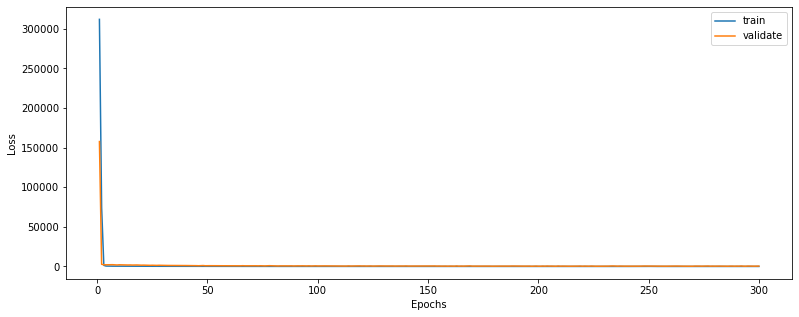

In [31]:
plot_loss(history)


In [32]:
n_vals = 100
yhats = [model.predict(X_test) for _ in range(n_vals)]

In [33]:
#average over all predictions 
avg = np.squeeze(yhats).mean(axis=0)
std = np.squeeze(yhats).std(axis=0)

#calculate some regression metrics
rmse = np.sqrt(np.mean(np.power(y_test-avg,2),axis=0))
print(rmse)
mse = np.mean(np.power(y_test-avg,2),axis=0)
print(mse)
mean_std = np.mean(np.squeeze(yhats).std(axis=0), axis=0)
print(mean_std)

Werkstueck_boden          17.504419
Werkstueck_zarge_mitte    25.696812
Werkstueck_zarge_oben     22.087748
dtype: float64
Werkstueck_boden          306.404682
Werkstueck_zarge_mitte    660.326164
Werkstueck_zarge_oben     487.868594
dtype: float64
[0.00040652 0.00061087 0.00060683]


In [34]:
def var_evaluate(y_true, y_hat, label='test'):
    mse = mean_squared_error(y_true, y_hat)
    rmse = np.sqrt(mse)
    variance = r2_score(y_true, y_hat)
    print('{} set RMSE:{}, R2:{}'.format(label, rmse, variance))
    return rmse, variance

def var_kfold(model, k, nvals=100):
    train_scores = [] 
    test_scores = []
    for k, (fold_X, fold_y)  in enumerate(zip(np.array_split(X_train, 3),np.array_split(y_train, 3))):
        print('__________Fold {}__________'.format(k+1))
        model.fit(fold_X, fold_y)
            
        yhats = [model.predict(fold_X) for _ in range(nvals)]  
        avgs = np.squeeze(yhats).mean(axis=0)
        print(np.shape(avgs))
        print(np.shape(fold_y))
        rmse = np.mean(np.sqrt(np.mean(np.power(fold_y-avgs,2),axis=0)))
        variance = r2_score(fold_y, avgs)
        #std = np.mean(np.squeeze(yhats).std(axis=0), axis=0)
        train_scores.append([rmse, variance])

    
    mean_train = np.mean(train_scores, axis=0)
    print(train_scores)
    std_train = np.std(train_scores, axis=0)
    RMSE = ufloat(mean_train[0], std_train[0])
    R2 = ufloat(mean_train[1], std_train[1])
    print('__________Summary__________')
    print('RMSE:{} , R2:{}'.format(RMSE,R2))

    return RMSE, R2

In [35]:
rmses, r2s = var_kfold(model,3)

__________Fold 1__________
21/21 [==============================] - 0s 2ms/step - loss: 16.5793
(654, 3)
(654, 3)
__________Fold 2__________
21/21 [==============================] - 0s 1ms/step - loss: 34.8309
(654, 3)
(654, 3)
__________Fold 3__________
21/21 [==============================] - 0s 1ms/step - loss: 39.7977
(653, 3)
(653, 3)
[[4.141949424167425, 0.9998277688731229], [5.78458355794771, 0.9996885112738138], [4.182144396592965, 0.9998116128048377]]
__________Summary__________
RMSE:4.7+/-0.8 , R2:0.99978+/-0.00006


In [36]:
y_hat_train = np.mean([model.predict(X_train) for _ in range(n_vals)],axis=0)

y_hat_test = avg


plt.figure(figsize=(20,8))
plt.plot(Timestamp, y_hat_test[:,0], 'g.-', label='Vorhergesagte Temperatur Boden')
plt.plot(Timestamp, y_test['Werkstueck_boden'], '--',label='Temperatur Werkstück Boden', color='navy')
plt.plot(Timestamp, test_data['Stempel_innen_mitte'],label='Temperatur Stempel mitte', color='orange')
#plt.plot(Timestamp, test_data['Matrize_mitte_zarge'],label='Temperatur Stempel mitte', color='crimson')

plt.ylabel('Temperatur \Theta /°C')
plt.xlabel('Timestamp /s')
plt.xlim(420, 470)
plt.legend()
plt.savefig('plots/random_forest_model.png')

train set RMSE:5.446353126517749, R2:0.9997214260892102
test set RMSE:16.222420577164016, R2:0.9969100085962225


(16.222420577164016, 0.9969100085962225)

# LSTM?

In [37]:
import tensorflow as tf

from tensorflow.keras import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Masking, TimeDistributed
tf.__version__

'2.8.0'

In [65]:
# taken from the TF Documentation
class WindowGenerator():
    def __init__(self, input_width, label_width, shift,
               train_df=train_data, val_df=test_data, test_df=test_data,
               label_columns=None):
    # Store the raw data.
        self.train_df = train_df
        self.val_df = val_df
        self.test_df = test_df

    # Work out the label column indices.
        self.label_columns = label_columns
        if label_columns is not None:
            self.label_columns_indices = {name: i for i, name in
                                    enumerate(label_columns)}
        self.column_indices = {name: i for i, name in
                           enumerate(train_df.columns)}

    # Work out the window parameters.
        self.input_width = input_width
        self.label_width = label_width
        self.shift = shift

        self.total_window_size = input_width + shift

        self.input_slice = slice(0, input_width)
        self.input_indices = np.arange(self.total_window_size)[self.input_slice]

        self.label_start = self.total_window_size - self.label_width
        self.labels_slice = slice(self.label_start, None)
        self.label_indices = np.arange(self.total_window_size)[self.labels_slice]

    def __repr__(self):
        return '\n'.join([
        f'Total window size: {self.total_window_size}',
        f'Input indices: {self.input_indices}',
        f'Label indices: {self.label_indices}',
        f'Label column name(s): {self.label_columns}'])
    
    def plot(self, model=None, plot_col='Werkstueck_boden', max_subplots=3):
        inputs, labels = self.example
        plt.figure(figsize=(12, 8))
        plot_col_index = self.column_indices[plot_col]
        max_n = min(max_subplots, len(inputs))
        for n in range(max_n):
            plt.subplot(max_n, 1, n+1)
            plt.ylabel(f'{plot_col} [normed]')
            plt.plot(self.input_indices, inputs[n, :, plot_col_index],
             label='Inputs', marker='.', zorder=-10)

            if self.label_columns:
                label_col_index = self.label_columns_indices.get(plot_col, None)
            else:
                label_col_index = plot_col_index

            if label_col_index is None:
                continue

            plt.scatter(self.label_indices, labels[n, :, label_col_index],
                edgecolors='k', label='Labels', c='#2ca02c', s=64)
            if model is not None:
                predictions = model(inputs)
                plt.scatter(self.label_indices, predictions[n, :, label_col_index],
                  marker='X', edgecolors='k', label='Predictions',
                  c='#ff7f0e', s=64)

            if n == 0:
                plt.legend()

        plt.xlabel('Time [min]')
        
    def split_window(self, features):
        inputs = features[:, self.input_slice, :]
        labels = features[:, self.labels_slice, :]
        if self.label_columns is not None:
            labels = tf.stack(
                [labels[:, :, self.column_indices[name]] for name in self.label_columns],
                axis=-1)

      # Slicing doesn't preserve static shape information, so set the shapes
      # manually. This way the `tf.data.Datasets` are easier to inspect.
        inputs.set_shape([None, self.input_width, None])
        labels.set_shape([None, self.label_width, None])

        return inputs, labels
    
    def make_dataset(self, data):
        data = np.array(data, dtype=np.float32)
        ds = tf.keras.utils.timeseries_dataset_from_array(
        data=data,
        targets=None,
        sequence_length=self.total_window_size,
        sequence_stride=1,
        shuffle=True,
        batch_size=32,)

        ds = ds.map(self.split_window)
        return ds
    
    @property
    def train(self):
        return self.make_dataset(self.train_df)

    @property
    def val(self):
        return self.make_dataset(self.val_df)

    @property
    def test(self):
        return self.make_dataset(self.test_df)

    @property
    def example(self):
        """Get and cache an example batch of `inputs, labels` for plotting."""
        result = getattr(self, '_example', None)
        if result is None:
    # No example batch was found, so get one from the `.train` dataset
            result = next(iter(self.train))
    # And cache it for next time
        self._example = result
        return result


def compile_and_fit(model, window, patience=2):
    early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                    patience=patience,
                                                    mode='min')

    model.compile(loss=tf.losses.MeanSquaredError(),
                optimizer=tf.optimizers.Adam(amsgrad=True),
                metrics=[tf.metrics.MeanAbsoluteError(),tf.metrics.RootMeanSquaredError()])

    history = model.fit(window.train, epochs=MAX_EPOCHS,
                      validation_data=window.val,
                      callbacks=[early_stopping])
    multi_lstm_model.summary()
    return history



Total window size: 110
Input indices: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95
 96 97 98 99]
Label indices: [100 101 102 103 104 105 106 107 108 109]
Label column name(s): ['Werkstueck_boden', 'Werkstueck_zarge_mitte', 'Werkstueck_zarge_oben']

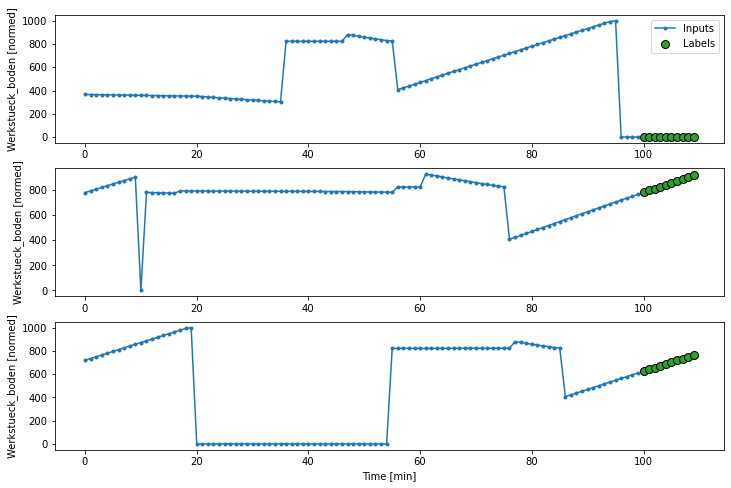

In [66]:
OUT_STEPS = 10
MAX_EPOCHS = 300
multi_window = WindowGenerator(input_width=100,
                               label_width=OUT_STEPS,
                               shift=OUT_STEPS,
                               label_columns=targets,
                               train_df=train_data,
                               val_df=test_data)

multi_window.plot()
multi_window

In [ ]:
num_features = output_dim
multi_lstm_model = tf.keras.Sequential([
    # Shape [batch, time, features] => [batch, lstm_units].
    # Adding more `lstm_units` just overfits more quickly.
    tf.keras.layers.LSTM(13, return_sequences=True),
    tf.keras.layers.LSTM(169, return_sequences=False),
    # Shape => [batch, out_steps*features].
    tf.keras.layers.Dense(OUT_STEPS*num_features,
                          kernel_initializer=tf.initializers.zeros()),
    # Shape => [batch, out_steps, features].
    tf.keras.layers.Reshape([OUT_STEPS, num_features])
])


history = compile_and_fit(multi_lstm_model, multi_window)


Epoch 1/300
58/58 [==============================] - 9s 100ms/step - loss: 361572.8750 - mean_absolute_error: 504.4486 - root_mean_squared_error: 601.3092 - val_loss: 276178.7500 - val_mean_absolute_error: 442.2299 - val_root_mean_squared_error: 525.5271
Epoch 2/300
58/58 [==============================] - 5s 92ms/step - loss: 350583.1875 - mean_absolute_error: 497.8861 - root_mean_squared_error: 592.1006 - val_loss: 267036.3125 - val_mean_absolute_error: 434.3852 - val_root_mean_squared_error: 516.7556
Epoch 3/300
58/58 [==============================] - 5s 88ms/step - loss: 340641.8125 - mean_absolute_error: 491.7680 - root_mean_squared_error: 583.6453 - val_loss: 258567.9219 - val_mean_absolute_error: 426.9430 - val_root_mean_squared_error: 508.4958
Epoch 4/300
57/58 [============================>.] - ETA: 0s - loss: 331603.3125 - mean_absolute_error: 486.2839 - root_mean_squared_error: 575.8501

In [ ]:
multi_val_performance = {}
multi_performance = {}
multi_val_performance['LSTM'] = multi_lstm_model.evaluate(multi_window.val)
multi_performance['LSTM'] = multi_lstm_model.evaluate(multi_window.test, verbose=0)
multi_window.plot(multi_lstm_model)


In [ ]:
multi_lstm_model.predict(multi_window.val)